In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
data=pd.read_csv('ML_Data.csv')

In [4]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15, random_state=42)
x_train.shape, x_test.shape

((3174, 29), (561, 29))

In [7]:
scaled=StandardScaler()
x_train_s=scaled.fit_transform(x_train)
x_test_s=scaled.fit_transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score

# Random Forest Classifier

In [9]:
model=RandomForestClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

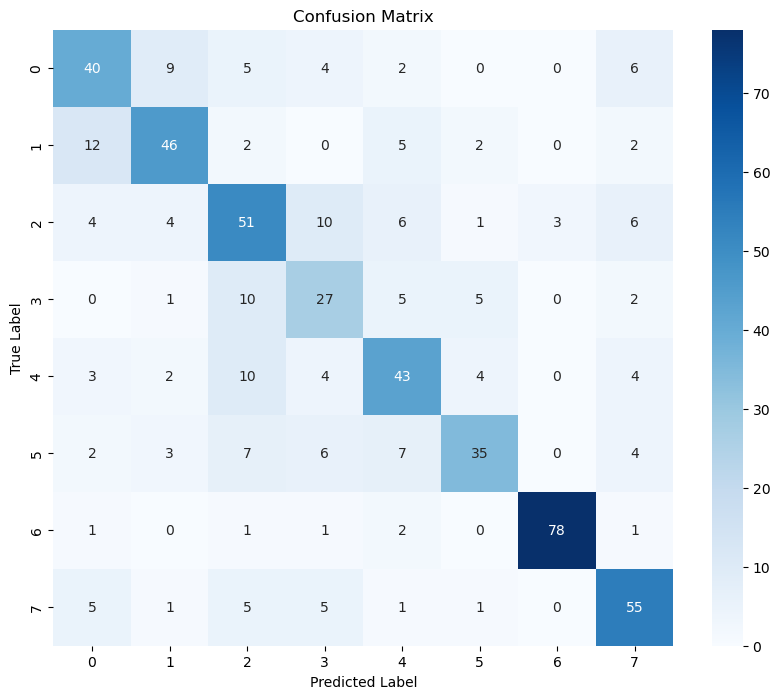

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.60        66
           1       0.70      0.67      0.68        69
           2       0.56      0.60      0.58        85
           3       0.47      0.54      0.50        50
           4       0.61      0.61      0.61        70
           5       0.73      0.55      0.62        64
           6       0.96      0.93      0.95        84
           7       0.69      0.75      0.72        73

    accuracy                           0.67       561
   macro avg       0.66      0.66      0.66       561
weighted avg       0.68      0.67      0.67       561



In [10]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# Gradient Boosting

In [11]:
model=GradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.926591052299937

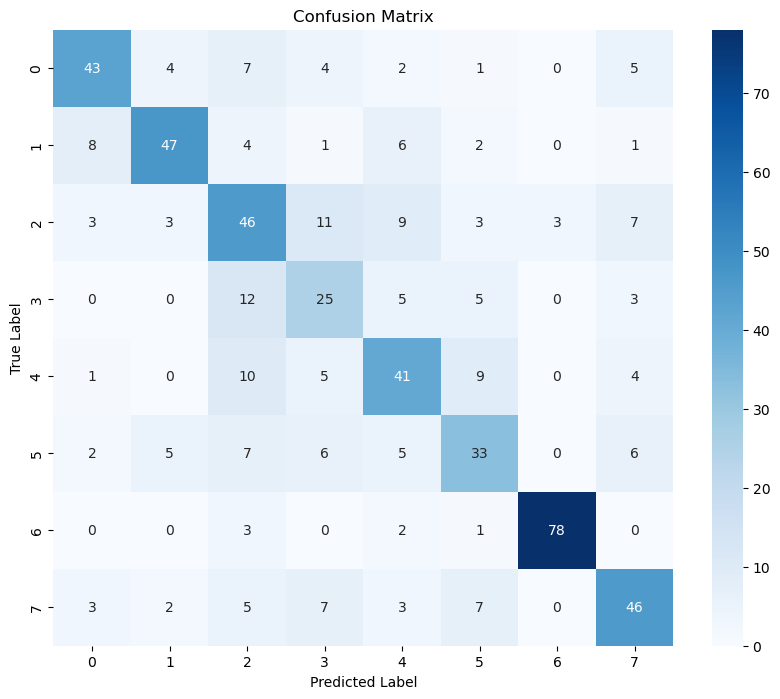

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        66
           1       0.77      0.68      0.72        69
           2       0.49      0.54      0.51        85
           3       0.42      0.50      0.46        50
           4       0.56      0.59      0.57        70
           5       0.54      0.52      0.53        64
           6       0.96      0.93      0.95        84
           7       0.64      0.63      0.63        73

    accuracy                           0.64       561
   macro avg       0.64      0.63      0.63       561
weighted avg       0.65      0.64      0.64       561



In [12]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# LGBM

In [13]:
model=LGBMClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 3174, number of used features: 29
[LightGBM] [Info] Start training from score -2.149245
[LightGBM] [Info] Start training from score -2.216309
[LightGBM] [Info] Start training from score -2.032063
[LightGBM] [Info] Start training from score -2.307006
[LightGBM] [Info] Start training from score -1.806998
[LightGBM] [Info] Start training from score -2.242665
[LightGBM] [Info] Start training from score -1.870385
[LightGBM] [Info] Start training from score -2.125212


0.9955891619407687

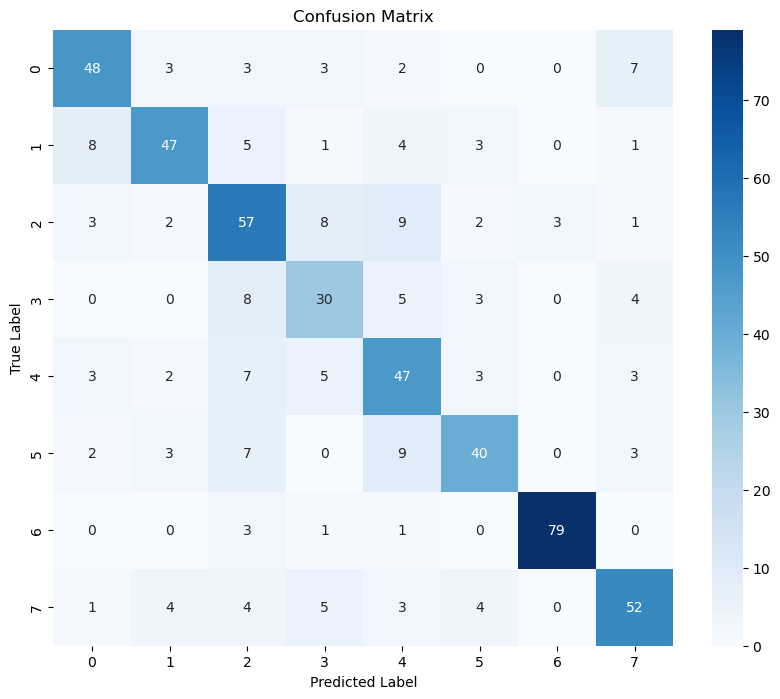

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73        66
           1       0.77      0.68      0.72        69
           2       0.61      0.67      0.64        85
           3       0.57      0.60      0.58        50
           4       0.59      0.67      0.63        70
           5       0.73      0.62      0.67        64
           6       0.96      0.94      0.95        84
           7       0.73      0.71      0.72        73

    accuracy                           0.71       561
   macro avg       0.71      0.70      0.71       561
weighted avg       0.72      0.71      0.71       561



In [14]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# XGBoost

In [15]:
model=XGBClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

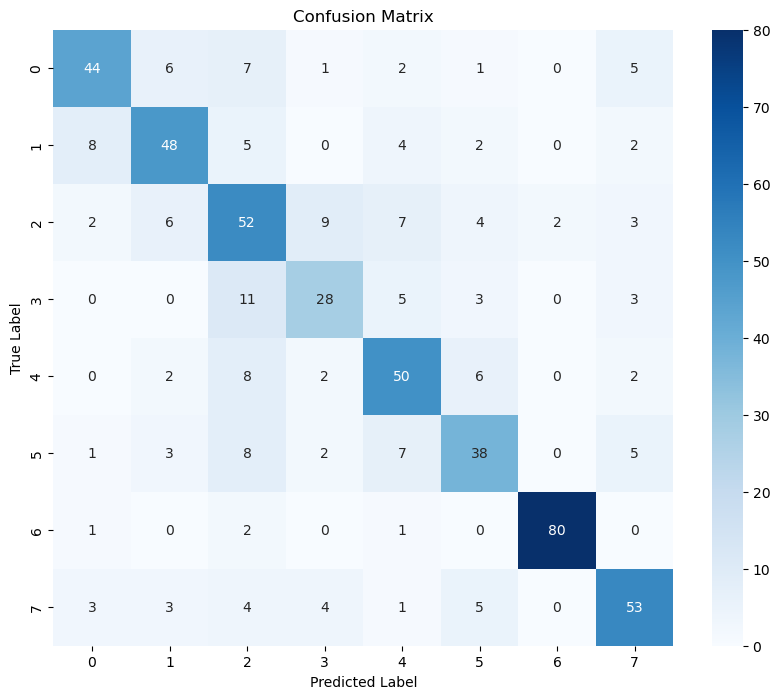

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.70        66
           1       0.71      0.70      0.70        69
           2       0.54      0.61      0.57        85
           3       0.61      0.56      0.58        50
           4       0.65      0.71      0.68        70
           5       0.64      0.59      0.62        64
           6       0.98      0.95      0.96        84
           7       0.73      0.73      0.73        73

    accuracy                           0.70       561
   macro avg       0.70      0.69      0.69       561
weighted avg       0.71      0.70      0.70       561



In [16]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# HistGradient Boosting

In [17]:
model=HistGradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

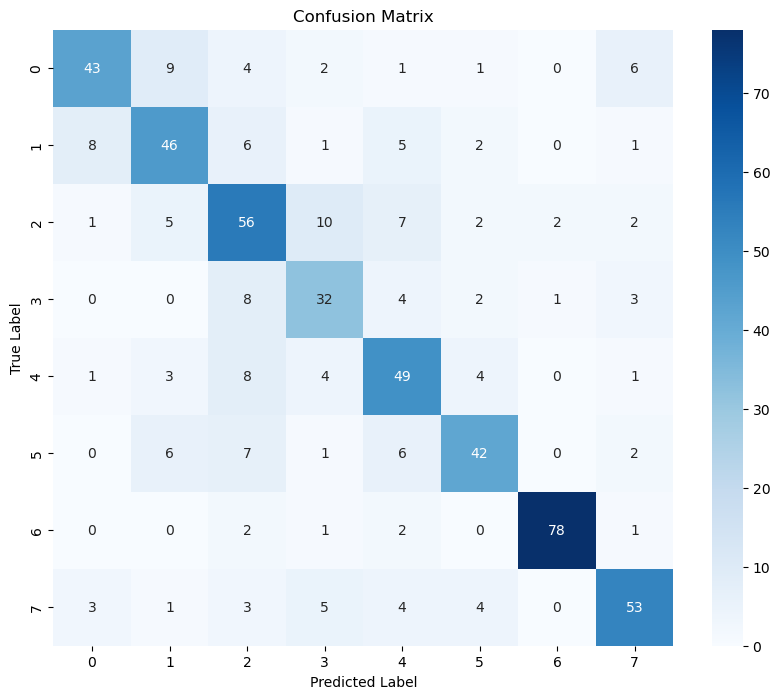

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        66
           1       0.66      0.67      0.66        69
           2       0.60      0.66      0.63        85
           3       0.57      0.64      0.60        50
           4       0.63      0.70      0.66        70
           5       0.74      0.66      0.69        64
           6       0.96      0.93      0.95        84
           7       0.77      0.73      0.75        73

    accuracy                           0.71       561
   macro avg       0.71      0.70      0.71       561
weighted avg       0.72      0.71      0.71       561



In [18]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)